In [1]:
import pandas as pd

In [297]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [298]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

<AxesSubplot:xlabel='loan_status', ylabel='count'>

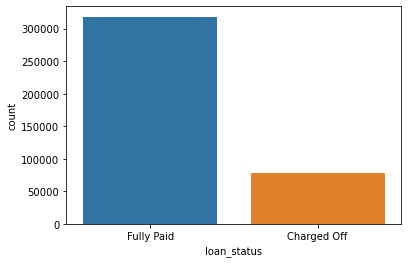

In [13]:
sns.countplot(x = df['loan_status'])

C:\Users\bason\anaconda\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

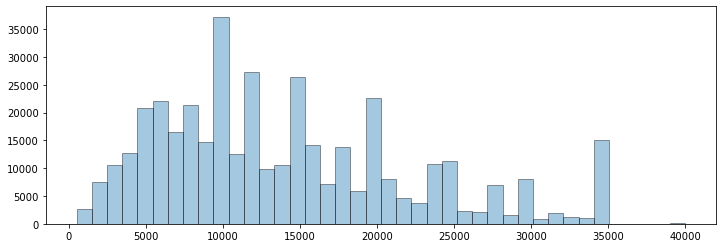

In [286]:
plt.figure(figsize = (12,4))
sns.distplot(x = df['loan_amnt'], kde = False, bins = 40, hist_kws = dict(edgecolor = 'black'))

In [287]:
from pandas import get_dummies

In [300]:
df['status'] = pd.get_dummies(df['loan_status'],drop_first=True)

In [301]:
df.corr()['status']

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
status                  1.000000
Name: status, dtype: float64

In [302]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

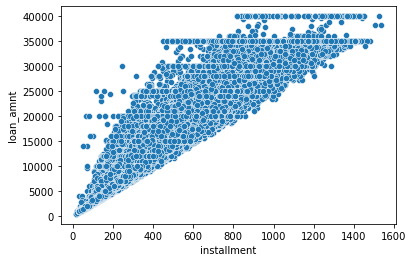

In [303]:
sns.scatterplot(x = 'installment', y= 'loan_amnt', data = df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

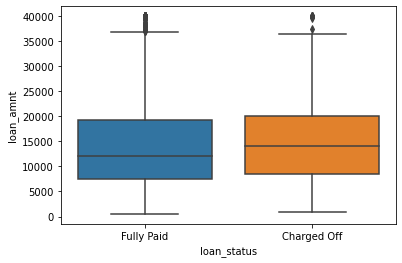

In [294]:
sns.boxplot(x = 'loan_status', y = 'loan_amnt', data = df)

In [295]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [304]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [ ]:
sorted(df['sub_grade'].unique())

In [ ]:
sns.countplot(x = 'grade', data = df, hue = 'loan_status')

In [ ]:
plt.figure(figsize = (12,4))
sns.countplot(x = 'sub_grade', data = df, order = sorted(df['sub_grade'].unique()))

In [ ]:
plt.figure(figsize = (12,4))
sns.countplot(x = 'sub_grade', data = df, order = sorted(df['sub_grade'].unique()), hue = 'loan_status', alpha = 0.5)

In [ ]:
subgrade = sorted(df['sub_grade'].unique())
fg = subgrade[25:]

In [ ]:
fg_data = df[df['sub_grade'].apply(lambda x: x in fg)]#df[(df['grade']=='G') | (df['grade']=='F')]

In [ ]:
plt.figure(figsize = (12,4))
sns.countplot(x = 'sub_grade', data = fg_data, order = fg, hue = 'loan_status')

In [ ]:
df[['loan_status','status']]

In [140]:
df.corr()['status'][:-1]

loan_amnt              -0.059836
int_rate               -0.247758
installment            -0.041082
annual_inc              0.053432
dti                    -0.062413
open_acc               -0.028012
pub_rec                -0.019933
revol_bal               0.010892
revol_util             -0.082373
total_acc               0.017893
mort_acc                0.073111
pub_rec_bankruptcies   -0.009383
Name: status, dtype: float64

In [138]:
col = df.select_dtypes([np.number]).columns[:-1]
len(col)

12

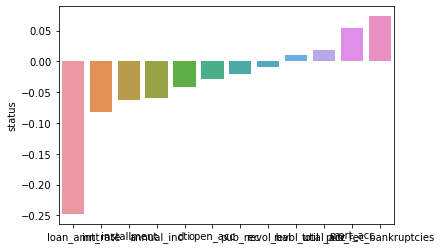

In [154]:
chart = sns.barplot(x = col ,y= df.corr()['status'][:-1].sort_values())

In [155]:
len(df)

396030

In [305]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
status                      0
dtype: int64

In [158]:
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
status                  0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [166]:
feat_info('title')
feat_info('emp_length')

The loan title provided by the borrower
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [165]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [167]:
df['emp_title'].value_counts()

Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
                            ... 
Town Of Harrison               1
Total Fire Systems, Inc.       1
operations team member         1
escorts/skycap                 1
Sergeant First Class/ E7       1
Name: emp_title, Length: 173105, dtype: int64

In [306]:
df = df.drop('emp_title',axis = 1)

In [178]:
col = sorted(df['emp_length'].unique().astype(str)[:-1])

<AxesSubplot:xlabel='emp_length', ylabel='count'>

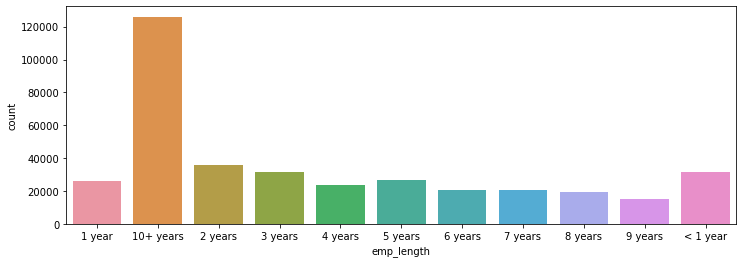

In [183]:
plt.figure(figsize=(12,4))

sns.countplot(x = df['emp_length'], order = col)

In [307]:
total = df.shape[0]
emp_length = df[df['status'] == 0].groupby('emp_length').count()['status'] /df[df['status'] == 1].groupby('emp_length').count()['status']

<AxesSubplot:xlabel='emp_length'>

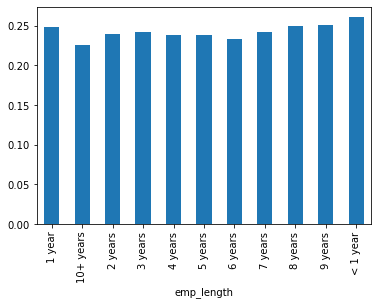

In [228]:
emp_length.plot.bar()

In [308]:
df = df.drop('emp_length', axis = 1)

In [309]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
status                      0
dtype: int64

In [240]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [72]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [310]:
df = df.drop('title', axis = 1)

In [242]:
feat_info('mort_acc')

Number of mortgage accounts.


In [243]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [284]:
df.corr()['mort_acc']

loan_amnt      0.223886
int_rate      -0.036404
installment    0.202430
annual_inc     0.193023
dti            0.102128
open_acc       0.680728
pub_rec        0.019723
revol_bal      0.191616
total_acc      1.000000
mort_acc       1.000000
status         0.017893
A2             0.021882
A3             0.018455
A4             0.011779
A5             0.017772
B1             0.009178
B2             0.003634
B3            -0.007525
B4            -0.004467
B5            -0.012341
C1            -0.011501
C2            -0.010301
C3            -0.005680
C4            -0.003857
C5            -0.004142
D1            -0.011341
D2            -0.014650
D3            -0.014599
D4            -0.006468
D5            -0.002905
E1             0.002057
E2             0.000277
E3             0.002563
E4             0.003573
E5             0.003245
F1             0.003318
F2             0.004292
F3            -0.001248
F4            -0.000276
F5             0.004610
G1             0.001235
G2             0

In [311]:
feat_info('total_acc')
val = df.groupby('total_acc').mean()['mort_acc']

The total number of credit lines currently in the borrower's credit file


In [312]:
def fill(mort, acc):
    if np.isnan(mort):
        return val[acc]
    else:
        return mort

In [313]:
df['mort_acc'] = df.apply(lambda x: fill(x['total_acc'], x['mort_acc']), axis=1)

In [314]:
df.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
status                    0
dtype: int64

In [448]:
df1.shape

(396030, 23)

In [317]:
df = df.dropna(axis = 1)
df.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
status                 0
dtype: int64

In [318]:
df.select_dtypes(exclude = ['number']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [271]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,address,status
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,25.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,27.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,26.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,13.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,43.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [396]:
df['term'].value_counts()

36    30151
60     9452
Name: term, dtype: int64

In [395]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [321]:
df1 = df

### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [350]:
df = df1
df = df.drop('grade',axis = 1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [349]:
pd.set_option('display.max_columns', 20)


In [351]:
sub_dummies = pd.get_dummies(df['sub_grade'], drop_first = True)

In [352]:
df = pd.concat([df.drop('sub_grade',axis=1),sub_dummies],axis=1)

In [353]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'address', 'status', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2',
       'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4',
       'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1',
       'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [354]:
ver_dummies = pd.get_dummies(df['verification_status'], drop_first = True)
app_dummies = pd.get_dummies(df['application_type'], drop_first = True)
init_dummies = pd.get_dummies(df['initial_list_status'], drop_first = True)
purpose_dummies = pd.get_dummies(df['purpose'], drop_first = True)

In [356]:
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),ver_dummies,app_dummies,init_dummies,purpose_dummies],axis=1)

In [362]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [361]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [365]:
owner_dummies = pd.get_dummies(df['home_ownership'], drop_first=True)
df = pd.concat([df.drop('home_ownership',axis = 1), owner_dummies], axis = 1)

In [375]:
df['zip_code'] = df.head()['address'].apply(lambda x: x.split()[-1])

In [376]:
zip_dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop('zip_code',axis = 1), zip_dummies], axis = 1)

In [377]:
df = df.drop('issue_d',axis =1)

In [381]:
df['year'] = df['earliest_cr_line'].apply(lambda x: x.split('-')[:][1])

In [383]:
from sklearn.model_selection import train_test_split

In [402]:
df = df.drop('loan_status', axis =1)

In [447]:
pd.set_option('display.max_columns', None)
df.shape

(39603, 71)

In [415]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,mort_acc,address,status,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,Source Verified,Verified,INDIVIDUAL,JOINT,w,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT,05113,11650,22690,year
320323,5500.0,36,21.99,210.02,38000.0,16.99,Apr-1991,10.0,1.0,3761.0,18.0,18.0,"05715 Wilson Highway\nLake Bruce, SC 05113",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1991
270206,10000.0,36,21.49,379.28,95000.0,17.08,May-2000,19.0,0.0,17553.0,37.0,37.0,"50609 Franco Run Apt. 857\nKeithbury, IL 48052",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2000
229969,16000.0,36,8.90,508.06,60000.0,22.00,Oct-1996,11.0,0.0,39866.0,20.0,20.0,"9058 Hall Summit Apt. 949\nPort Michael, MT 00813",1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1996
395169,7200.0,36,12.29,240.15,38000.0,21.76,Aug-2001,9.0,1.0,8107.0,13.0,13.0,"7166 Joel Park\nToddview, ND 11650",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2001
240800,25000.0,36,11.53,824.76,60000.0,12.20,Jan-2007,7.0,0.0,13753.0,9.0,9.0,"2506 Smith Mill\nNew Alexisborough, IN 86630",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2007


In [425]:
df = df.drop('address',axis = 1)

KeyError: "['address'] not found in axis"

In [389]:
df = df.sample(frac=0.1,random_state=101)
print(len(df))

39603


In [426]:
X = df.drop('status',axis = 1).values
y = df['status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [391]:
from sklearn.preprocessing import MinMaxScaler

In [392]:
scaler = MinMaxScaler()

In [427]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [428]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [429]:
model = Sequential()
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')


In [446]:
X.shape

(39603, 70)

In [431]:
model.fit(X_train, y_train, epochs= 25, batch_size = 256,validation_data = (X_test,y_test))

Train on 31682 samples, validate on 7921 samples
Epoch 1/25
31682/31682 [==============================] - 3s 109us/sample - loss: 0.5344 - val_loss: 0.4850
Epoch 2/25
31682/31682 [==============================] - 1s 42us/sample - loss: 0.4927 - val_loss: 0.4691
Epoch 3/25
31682/31682 [==============================] - 1s 44us/sample - loss: 0.4839 - val_loss: 0.4718
Epoch 4/25
31682/31682 [==============================] - 1s 45us/sample - loss: 0.4797 - val_loss: 0.4686
Epoch 5/25
31682/31682 [==============================] - 1s 45us/sample - loss: 0.4747 - val_loss: 0.4669
Epoch 6/25
31682/31682 [==============================] - 1s 44us/sample - loss: 0.4753 - val_loss: 0.4645
Epoch 7/25
31682/31682 [==============================] - 1s 43us/sample - loss: 0.4731 - val_loss: 0.4654
Epoch 8/25
31682/31682 [==============================] - 1s 39us/sample - loss: 0.4729 - val_loss: 0.4650
Epoch 9/25
31682/31682 [==============================] - 1s 37us/sample - loss: 0.4701 - val_

In [434]:
loss =pd.DataFrame( model.history.history)

<AxesSubplot:>

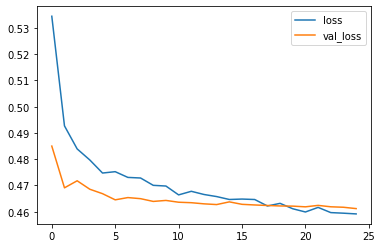

In [435]:
loss.plot()

In [442]:
pred = model.predict_classes(X_test)

In [443]:
pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [438]:
from sklearn.metrics import classification_report, confusion_matrix

In [444]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[   0 1586]
 [   0 6335]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1586
           1       0.80      1.00      0.89      6335

    accuracy                           0.80      7921
   macro avg       0.40      0.50      0.44      7921
weighted avg       0.64      0.80      0.71      7921



C:\Users\bason\anaconda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                    6.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64